In [321]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
from datetime import datetime

#### The data is in 12 files, so what we need is to put it into a single file

In [84]:
df = pd.read_csv('C:/Users/antho/Desktop/Portafolio/Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('C:/Users/antho/Desktop/Portafolio/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('C:/Users/antho/Desktop/Portafolio/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.head()
#So we get our data into "files" list. The next step is put it all into a single dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [85]:
all_months_data.to_csv('new_data.csv')
all_data = pd.read_csv('new_data.csv')
all_data.head()

all_data.drop('Unnamed: 0', axis = 1, inplace = True)

### With all the data in a single DataFrame, is time to clean it and prepare for the analysis

The first thing is looking for NaN values in all the columns

In [86]:
missing_values = all_data.isnull()
missing_values.head()

#Counting the number of missing values in each column
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print("")
    
#The False label correspond to a data 
#The True label correspond to a missing data

Order ID
False    186305
True        545
Name: Order ID, dtype: int64

Product
False    186305
True        545
Name: Product, dtype: int64

Quantity Ordered
False    186305
True        545
Name: Quantity Ordered, dtype: int64

Price Each
False    186305
True        545
Name: Price Each, dtype: int64

Order Date
False    186305
True        545
Name: Order Date, dtype: int64

Purchase Address
False    186305
True        545
Name: Purchase Address, dtype: int64



In [87]:
all_data.dropna(inplace = True)
#In the this line, we delete all rows with missing values

In [88]:
missing_values = all_data.isnull()
missing_values.head()

#Counting the number of missing values in each column
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print("")
    
#The False label correspond to a data 
#The True label correspond to a missing data

Order ID
False    186305
Name: Order ID, dtype: int64

Product
False    186305
Name: Product, dtype: int64

Quantity Ordered
False    186305
Name: Quantity Ordered, dtype: int64

Price Each
False    186305
Name: Price Each, dtype: int64

Order Date
False    186305
Name: Order Date, dtype: int64

Purchase Address
False    186305
Name: Purchase Address, dtype: int64



In [89]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Creating a new column for Days, Months and Years

In [90]:
all_data[['Month', 'Day', 'Year']] = all_data['Order Date'].str.split('/', expand = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,19 08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,07,19 22:30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19 14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19 14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,30,19 09:27


#### As we can see, we have a problem with the last column 'Year'. To fix it what we could do is select just the first two elements in the values

In [91]:
all_data['Year'] = all_data['Year'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,07,19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,30,19


#### Now we can transform the type of those columns, from 'object' to 'int'

In [130]:
all_data['Month'] = all_data['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Order Date'

#### We find string values in columns where it supposed don't should exist. There is a string 'Order Date' in those columns

#### Find the 'Order Date' and delete it

In [150]:
all_data = all_data[all_data['Month'] != 'Order Date']
all_data.shape

(185950, 9)

#### Transforming the columns 'Day', 'Month' and 'Year' to integers.

In [155]:
all_data[['Month','Day','Year', 'Quantity Ordered']] = all_data[['Month', 'Day', 'Year', 'Quantity Ordered']].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [157]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19


#### Adding a sales column

In [162]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99


## What was the best month for sales? How much was earned that month?

In [178]:
total_sales = all_data.groupby('Month')['Sales'].sum()
total_sales

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [183]:
f'The best month for sale was December with: ${total_sales.max()}'

'The best month for sale was December with: $4613443.340001534'

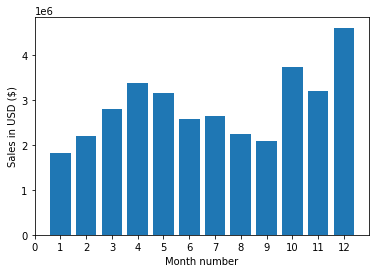

In [213]:
#Plotting the resutls
plt.bar(np.sort(all_data['Month'].unique()),total_sales)
plt.xticks(range(13))
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### What city had the highest number of sales?

In [214]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.9


#### As we can see, the 'Purchase Address' column contain information about the City and State where the purchase was made. So, with this in mind, we will separate that column in two: 'City' and 'State'

In [245]:
all_data[['Street', 'City', 'State']] = all_data['Purchase Address'].str.split(',', expand = True)
all_data['City'] = all_data['City'] + (all_data['State'].str[0:3])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90,917 1st St,Dallas TX,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99,682 Chestnut St,Boston MA,MA 02215


#### As we have already the information of the column 'State' in the 'City' column , we can drop the 'State' column

In [246]:
all_data.drop(['State'], axis = 1, inplace = True)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,Street,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90,917 1st St,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99,682 Chestnut St,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,669 Spruce St,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,669 Spruce St,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99,333 8th St,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,17,19,8.97,840 Highland St,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,19,700.00,216 Dogwood St,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,23,19,700.00,220 12th St,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,19,19,379.99,511 Forest St,San Francisco CA


#### Now it is possible to know what is the city with the highest number of sales

In [247]:
city_highest_sale = all_data.groupby('City')['Sales'].sum()
city_highest_sale

City
 Atlanta GA          2.795499e+06
 Austin TX           1.819582e+06
 Boston MA           3.661642e+06
 Dallas TX           2.767975e+06
 Los Angeles CA      5.452571e+06
 New York City NY    4.664317e+06
 Portland ME         4.497583e+05
 Portland OR         1.870732e+06
 San Francisco CA    8.262204e+06
 Seattle WA          2.747755e+06
Name: Sales, dtype: float64

In [248]:
f'The city with the highest sales is San Francisco with ${city_highest_sale.max()}'

'The city with the highest sales is San Francisco with $8262203.910004012'

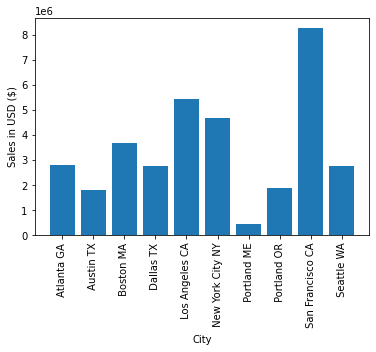

In [469]:
#Plotting the resutls
cities1 = [x for x in city_highest_sale.index]
plt.bar(cities1,city_highest_sale)
plt.xticks(rotation = 90 )
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [269]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,Street,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90,917 1st St,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99,682 Chestnut St,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,669 Spruce St,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,669 Spruce St,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99,333 8th St,Los Angeles CA


In [359]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minutes'] = pd.to_datetime(all_data['Order Date']).dt.minute

In [343]:
best_time_sale = all_data.groupby('Hour')['Sales'].sum()
best_time_sale

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

In [347]:
hours = np.sort(all_data['Hour'].unique())
hours

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

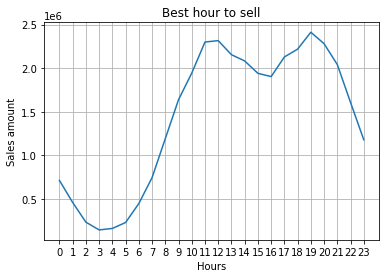

In [357]:
plt.grid()
plt.title('Best hour to sell')
plt.xlabel('Hours')
plt.ylabel('Sales amount')
plt.xticks(hours)
plt.plot(hours, best_time_sale)
plt.show()

### What products are most often sold?

In [360]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,Street,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90,917 1st St,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,19,99.99,682 Chestnut St,Boston MA,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,669 Spruce St,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,669 Spruce St,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99,333 8th St,Los Angeles CA,9,27


In [430]:
product_sale = all_data.groupby(['Product'], sort = True)
quantity = product_sale.sum()['Quantity Ordered']

In [440]:
quantity

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [439]:
products = [x for x in quantity.index]

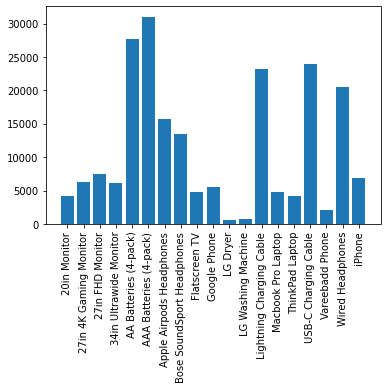

In [438]:
plt.xticks(rotation = 90)
plt.bar(products, quantity)
plt.show()